# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

629


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Lists
city_id = []
city_name = []
cloudlines = []
country = []
date = []
humidity = []
lat = []
long = []
max_temp = []
wind_speed = []

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

for city in cities:
    response = requests.get(query_url + city).json()
    if response == {'cod': '404', 'message': 'city not found'}:
        print(f"City {cities.index(city)} Not Found")
    else:
        city_id.append([cities.index(city)])
        city_name.append(city)
        cloudlines.append(response['clouds']['all'])
        country.append(response["sys"]['country'])
        date.append(response["dt"])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]['lat'])
        long.append(response["coord"]['lon'])
        max_temp.append(response["main"]['temp_max'])
        wind_speed.append(response["wind"]['speed'])
        print(f"City {cities.index(city)} : {city}")

City 0 : ribeira grande
City 1 : honningsvag
City 2 : punta arenas
City 3 : salalah
City 4 : qaanaaq
City 5 : puerto colombia
City 6 : bosconia
City 7 : bandar
City 8 : yellowknife
City 9 : puerto ayora
City 10 : hobart
City 11 : carnarvon
City 12 : geraldton
City 13 Not Found
City 14 : busselton
City 15 : hermanus
City 16 : bathsheba
City 17 : talnakh
City 18 : abu samrah
City 19 : ancud
City 20 : chuy
City 21 : solnechnyy
City 22 : genhe
City 23 : ribas do rio pardo
City 24 : esperance
City 25 : cabo san lucas
City 26 : quatre cocos
City 27 : cidreira
City 28 : tiksi
City 29 : tuim
City 30 : bluff
City 31 : bairiki
City 32 : port alfred
City 33 : saint-philippe
City 34 : gat
City 35 : ponta do sol
City 36 : madiun
City 37 : victoria
City 38 : chokurdakh
City 39 : avarua
City 40 : ruteng
City 41 : zunyi
City 42 : barrow
City 43 : rikitea
City 44 : monticello
City 45 : lagoa
City 46 Not Found
City 47 Not Found
City 48 : namatanai
City 49 Not Found
City 50 Not Found
City 51 : karla
City

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    "City ID":city_id,
    "City Name" : city_name,
    "Cloudiness" : cloudlines,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Latitiude" : lat,
    "Longitude" : long,
    "Max Temp" : max_temp,
    "Wind Speed" : wind_speed,
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,City ID,City Name,Cloudiness,Country,Date,Humidity,Latitiude,Longitude,Max Temp,Wind Speed
0,[0],ribeira grande,91,PT,1665537239,89,38.5167,-28.7000,69.78,1.99
1,[1],honningsvag,100,NO,1665537239,71,70.9821,25.9704,46.15,13.80
2,[2],punta arenas,75,CL,1665537155,81,-53.1500,-70.9167,39.31,18.41
3,[3],salalah,0,OM,1665537240,49,17.0151,54.0924,73.49,2.30
4,[4],qaanaaq,44,GL,1665537240,62,77.4840,-69.3632,5.79,7.85
...,...,...,...,...,...,...,...,...,...,...
576,[623],mackenzie,13,CA,1665537309,50,55.2999,-123.1698,52.66,7.74
577,[624],timmins,40,CA,1665537334,62,48.4669,-81.3331,55.22,9.22
578,[625],maniitsoq,90,GL,1665537419,76,65.4167,-52.9000,28.62,9.55
579,[626],jacqueville,93,CI,1665537420,86,5.2052,-4.4146,77.32,8.41


In [5]:
#with open('city_weather_data.csv', 'w') as 
weather_data.to_csv("cities.csv") 

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
clean_city_data = weather_data[weather_data['Humidity'] < 100]
print(len(clean_city_data))

576


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

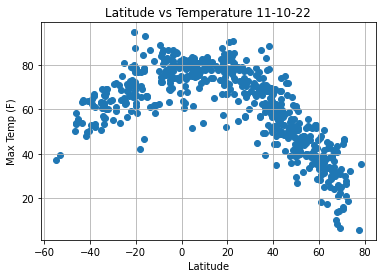

In [8]:
from datetime import datetime

plt.scatter(clean_city_data["Latitiude"],clean_city_data["Max Temp"])
plt.title(f"Latitude vs Temperature {datetime.fromtimestamp(max(date)).strftime('%d-%m-%y')}")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid()

# Here the code is analyzing the relationship between the latitude of each city and the maximum temperture

## Latitude vs. Humidity Plot

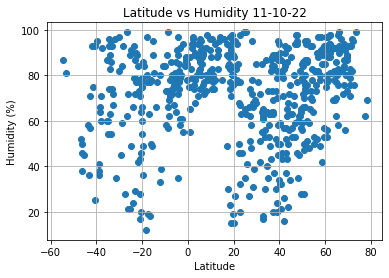

In [9]:
plt.scatter(clean_city_data["Latitiude"],clean_city_data["Humidity"])
plt.title(f"Latitude vs Humidity {datetime.fromtimestamp(max(date)).strftime('%d-%m-%y')}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Here the code is analyzing the relationship between the latitude of each city and the humidity

## Latitude vs. Cloudiness Plot

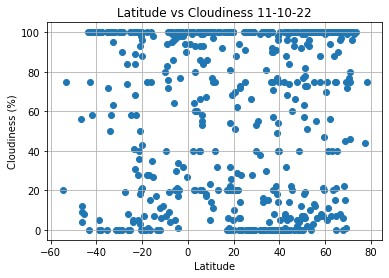

In [10]:
plt.scatter(clean_city_data["Latitiude"],clean_city_data["Cloudiness"])
plt.title(f"Latitude vs Cloudiness {datetime.fromtimestamp(max(date)).strftime('%d-%m-%y')}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Here the code is analyzing the relationship between the latitude of each city and the cloudiness

## Latitude vs. Wind Speed Plot

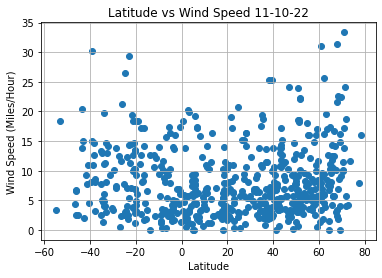

In [11]:
plt.scatter(clean_city_data["Latitiude"],clean_city_data["Wind Speed"])
plt.title(f"Latitude vs Wind Speed {datetime.fromtimestamp(max(date)).strftime('%d-%m-%y')}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (Miles/Hour)")
plt.grid()

# Here the code is analyzing the relationship between the latitude of each city and the wind speed

## Linear Regression

In [12]:
northern_hemi_data = clean_city_data[clean_city_data['Longitude'] >= 0]
southern_hemi_data = clean_city_data[clean_city_data['Longitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

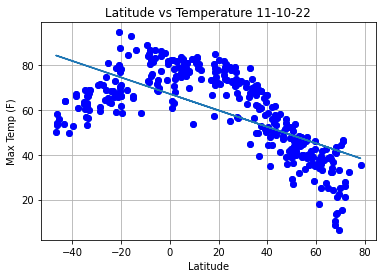

In [13]:
plt.scatter(northern_hemi_data["Latitiude"],northern_hemi_data["Max Temp"])
plt.title(f"Latitude vs Temperature {datetime.fromtimestamp(max(date)).strftime('%d-%m-%y')}")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid()

x = northern_hemi_data["Latitiude"]
y = northern_hemi_data["Max Temp"]

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

plt.plot(x,y, 'bo', x, poly1d_fn(x))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

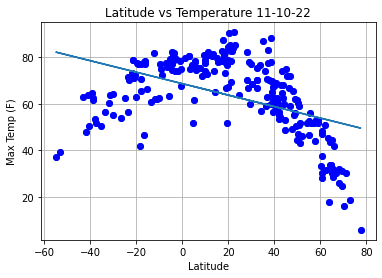

In [29]:
plt.scatter(southern_hemi_data["Latitiude"],southern_hemi_data["Max Temp"])
plt.title(f"Latitude vs Temperature {datetime.fromtimestamp(max(date)).strftime('%d-%m-%y')}")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid()

x = southern_hemi_data["Latitiude"]
y = southern_hemi_data["Max Temp"]

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

plt.plot(x,y, 'bo', x, poly1d_fn(x))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

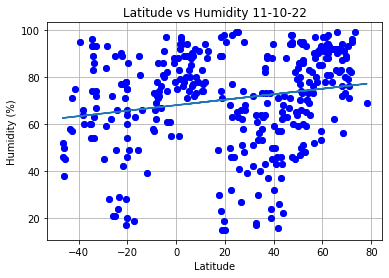

In [30]:
plt.scatter(northern_hemi_data["Latitiude"],northern_hemi_data["Humidity"])
plt.title(f"Latitude vs Humidity {datetime.fromtimestamp(max(date)).strftime('%d-%m-%y')}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

x = northern_hemi_data["Latitiude"]
y = northern_hemi_data["Humidity"]

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

plt.plot(x,y, 'bo', x, poly1d_fn(x))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

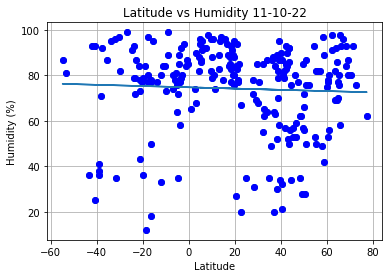

In [31]:
plt.scatter(southern_hemi_data["Latitiude"],southern_hemi_data["Humidity"])
plt.title(f"Latitude vs Humidity {datetime.fromtimestamp(max(date)).strftime('%d-%m-%y')}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

x = southern_hemi_data["Latitiude"]
y = southern_hemi_data["Humidity"]

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

plt.plot(x,y, 'bo', x, poly1d_fn(x))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

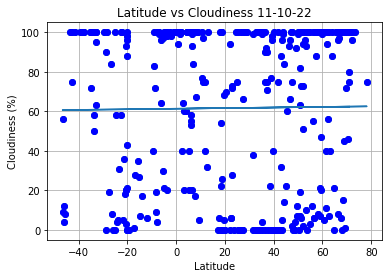

In [32]:
plt.scatter(northern_hemi_data["Latitiude"],northern_hemi_data["Cloudiness"])
plt.title(f"Latitude vs Cloudiness {datetime.fromtimestamp(max(date)).strftime('%d-%m-%y')}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

x = northern_hemi_data["Latitiude"]
y = northern_hemi_data["Cloudiness"]

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

plt.plot(x,y, 'bo', x, poly1d_fn(x))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

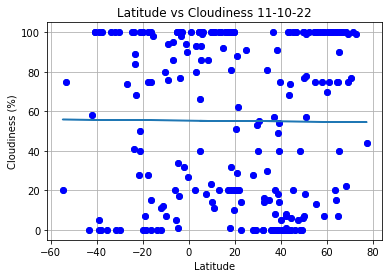

In [33]:
plt.scatter(southern_hemi_data["Latitiude"],southern_hemi_data["Cloudiness"])
plt.title(f"Latitude vs Cloudiness {datetime.fromtimestamp(max(date)).strftime('%d-%m-%y')}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

x = southern_hemi_data["Latitiude"]
y = southern_hemi_data["Cloudiness"]

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

plt.plot(x,y, 'bo', x, poly1d_fn(x))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

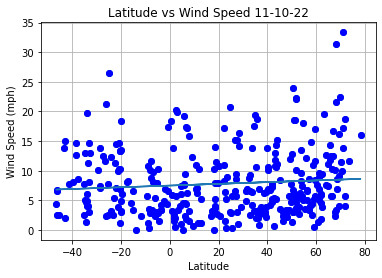

In [34]:
plt.scatter(northern_hemi_data["Latitiude"],northern_hemi_data["Wind Speed"])
plt.title(f"Latitude vs Wind Speed {datetime.fromtimestamp(max(date)).strftime('%d-%m-%y')}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

x = northern_hemi_data["Latitiude"]
y = northern_hemi_data["Wind Speed"]

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

plt.plot(x,y, 'bo', x, poly1d_fn(x))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

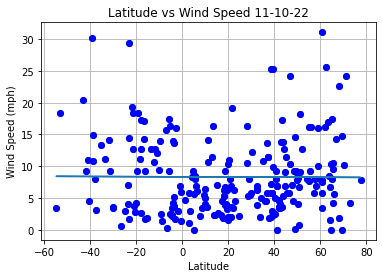

In [35]:
plt.scatter(southern_hemi_data["Latitiude"],southern_hemi_data["Wind Speed"])
plt.title(f"Latitude vs Wind Speed {datetime.fromtimestamp(max(date)).strftime('%d-%m-%y')}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

x = southern_hemi_data["Latitiude"]
y = southern_hemi_data["Wind Speed"]

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

plt.plot(x,y, 'bo', x, poly1d_fn(x))